# The Rotated MITgcm!

In [203]:
import xarray as xr
import numpy as np
import xgcm
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

import warnings
warnings.filterwarnings('ignore', '.*FutureWarning*.')
warnings.filterwarnings('ignore', '.*.')

div_cmap = plt.get_cmap('RdBu_r')
div_cmap.set_bad(color=(0.8,0.8,0.8))

cmap = plt.get_cmap('viridis')
cmap.set_bad(color=(0.8,0.8,0.8))

In [198]:
Iter = 200
data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/rotated_setups/3d_rotated_perturbations_kfile/run"
#data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/rotated_setups/3d_rotated_perturbations_hills_kfile/run"
ds = open_mdsdataset(data_dir,iters=[Iter],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])

ds['time'] = ds['time']*60 # convert from iterations to seconds
grid = xgcm.Grid(ds, periodic=['X','Y'])

coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)
coords['dV'] = coords['rA']*(coords['drF']*coords['hFacC'])

(-2370, -2100)

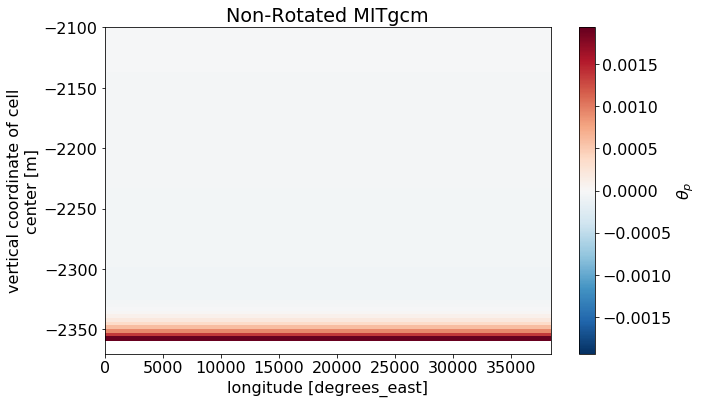

In [200]:
q = ds['THETA'].isel(YC=64).plot(cmap=div_cmap)
q.colorbar.set_label(r'$\theta_{p}$')
levels = np.arange(0.,1.,3.e-2)
plt.title('Non-Rotated MITgcm')
plt.ylim([-2370,-2100])
#q.set_clim([-1.e-18,1.e-18])

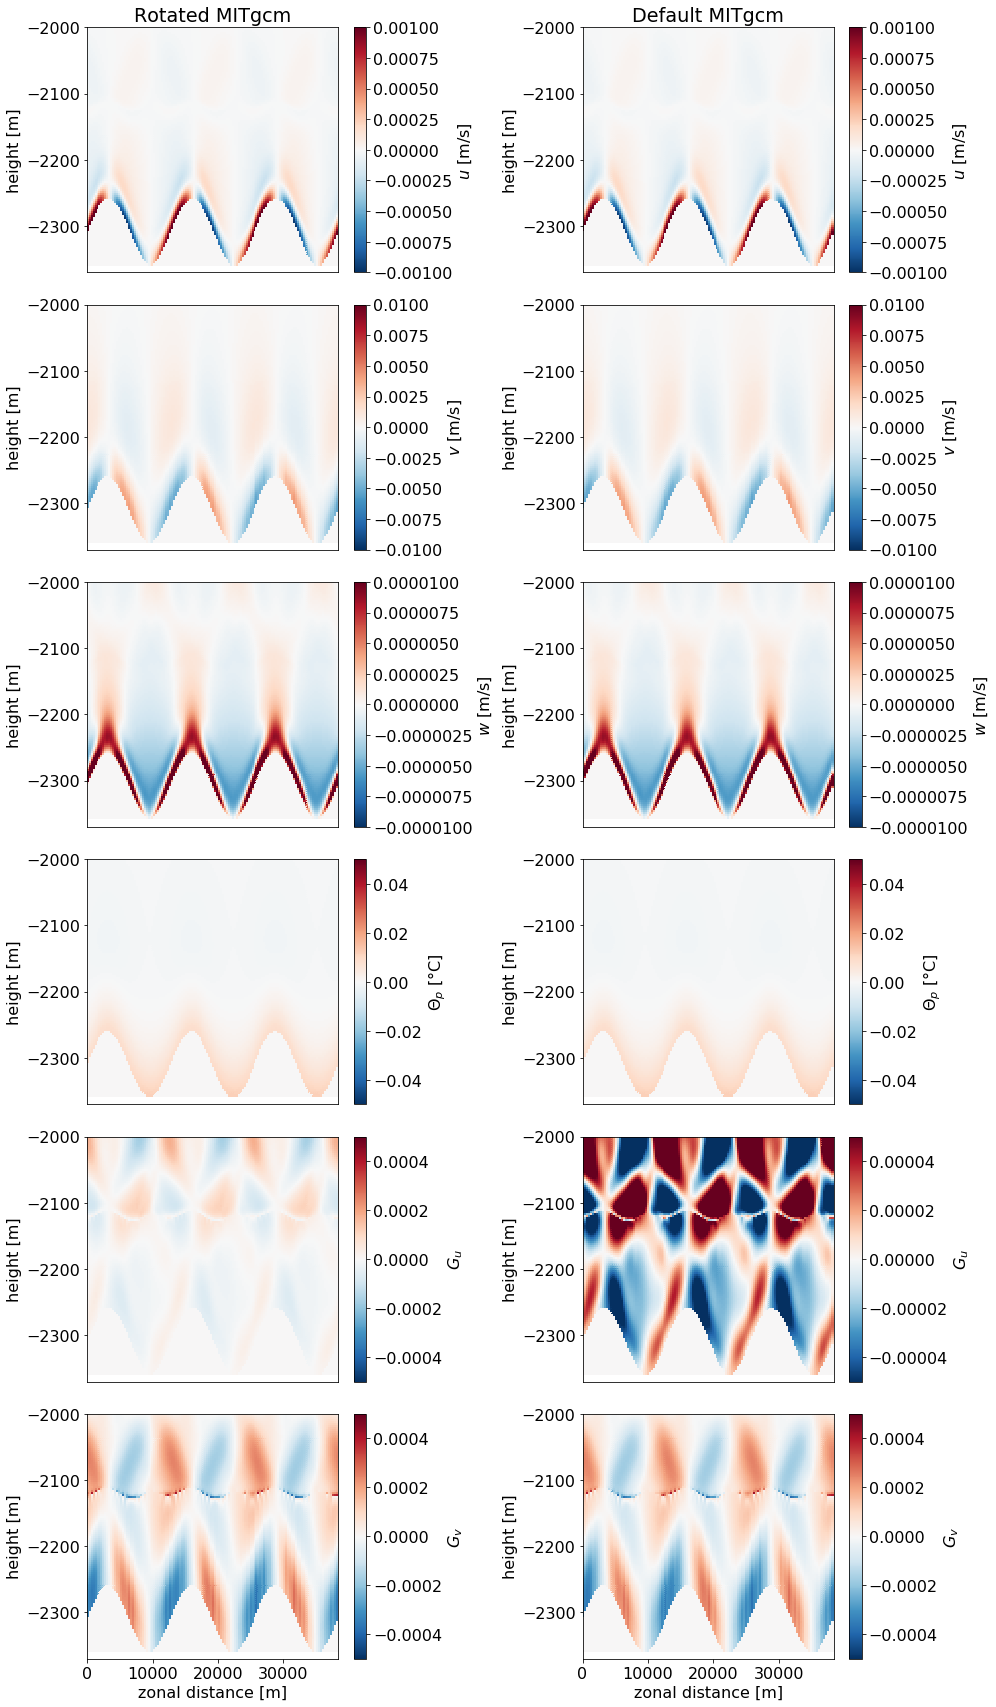

In [206]:
Iter0 = 7200
data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/rotated_setups/3d_rotated_perturbations_hills_kfile/run"
ds = open_mdsdataset(data_dir,iters=[Iter0],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])
ds['time'] = ds['time']*60 # convert from iterations to seconds
grid = xgcm.Grid(ds, periodic=['X','Y'])

ds0 = open_mdsdataset(data_dir,iters=[180],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])
ds['THETA'] = ds['THETA'] - ds0['THETA'].values

coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)
coords['dV'] = coords['rA']*(coords['drF']*coords['hFacC'])

ds0_og = ds0.copy()
ds_og = ds.copy()
coords_og = ds.copy()

plt.figure(figsize=(14,24))

levels = np.arange(0.,1.,3.e-2)
ylim = [-2370,-2000]
#ylim = [-2370,0]

plt.subplot(6,2,1)
q = ds['UVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('Rotated MITgcm')
q.set_clim([-1e-3,1e-3])
plt.ylim(ylim)
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$u$ [m/s]')

plt.subplot(6,2,3)
q = ds['VVEL'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-1e-2,1e-2])
plt.ylim(ylim)
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$v$ [m/s]')

plt.subplot(6,2,5)
q = ds['WVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-1e-5,1e-5])
plt.ylim(ylim)
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$w$ [m/s]')

plt.subplot(6,2,7)
q = ds['THETA'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-2,5e-2])
plt.ylim(ylim)
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$\Theta_{p}$ [$\degree$C]')

plt.subplot(6,2,9)
q = ds['TOTUTEND'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim(ylim)
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$G_{u}$')

plt.subplot(6,2,11)
q = ds['TOTVTEND'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim(ylim)
plt.ylabel('height [m]')
plt.xlabel('zonal distance [m]')
q.colorbar.set_label(r'$G_{v}$')

data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/rotated_setups/3d_rotated_perturbations_hills_kfile/run"
ds = open_mdsdataset(data_dir,iters=[Iter0],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])
ds['time'] = ds['time']*60 # convert from iterations to seconds
grid = xgcm.Grid(ds, periodic=['X','Y'])

ds0 = open_mdsdataset(data_dir,iters=[180],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])
ds['THETA'] = ds['THETA'] - ds0['THETA'].values

coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)
coords['dV'] = coords['rA']*(coords['drF']*coords['hFacC'])

plt.subplot(6,2,2)
q = ds['UVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('Default MITgcm')
q.set_clim([-1e-3,1e-3])
q.colorbar.set_label(r'$u$ [m/s]')
plt.ylim(ylim)
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')

plt.subplot(6,2,4)
q = ds['VVEL'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-1e-2,1e-2])
q.colorbar.set_label(r'$v$ [m/s]')
plt.ylim(ylim)
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')

plt.subplot(6,2,6)
q = ds['WVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-1e-5,1e-5])
q.colorbar.set_label(r'$w$ [m/s]')
plt.ylim(ylim)
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')

plt.subplot(6,2,8)
q = ds['THETA'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-2,5e-2])
q.colorbar.set_label(r'$\Theta_{p}$ [$\degree$C]')
plt.ylim(ylim)
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')


plt.subplot(6,2,10)
q = ds['TOTUTEND'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-5,5e-5])
q.colorbar.set_label(r'$G_{u}$')
plt.ylim(ylim)
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')

plt.subplot(6,2,12)
q = ds['TOTVTEND'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
q.colorbar.set_label(r'$G_{v}$')
plt.ylim(ylim)
plt.ylabel('height [m]')
plt.xlabel('zonal distance [m]')

plt.tight_layout()
plt.savefig('/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/figures/rotated_bbl.png',bbox_inches='tight',dpi=150)

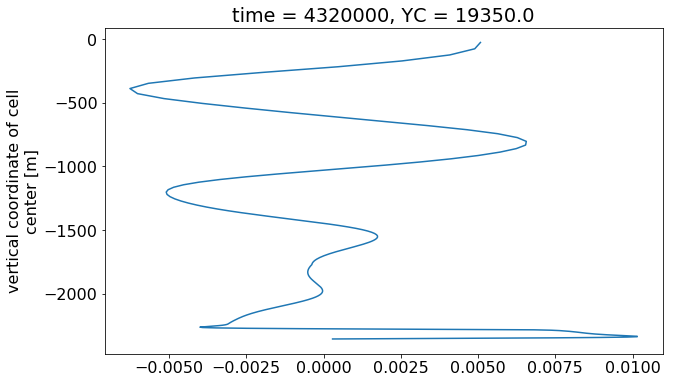

In [32]:
(ds_og['UVEL']*coords_og['drF']*coords_og['hFacW']).sum('XG').isel(YC=64).plot(y='Z')

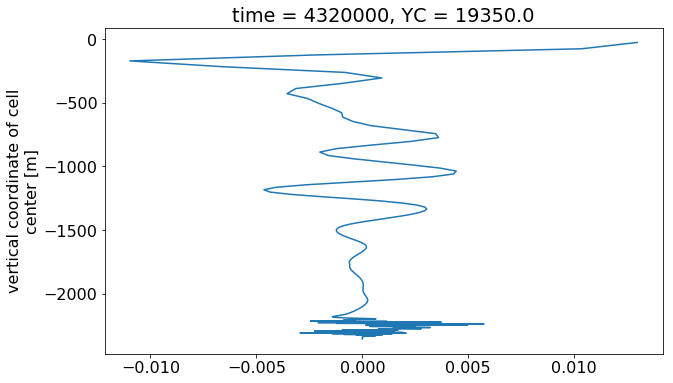

In [33]:
(ds['UVEL']*coords['drF']*coords['hFacW']).sum('XG').isel(YC=64).plot(y='Z')